In [1]:
from keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization, GlobalAveragePooling2D
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.models import Sequential
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

c:\Users\Emmanuel\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
img_height, img_width = (224,224)
batch_size = 32

train_data_dir = r"processed_data\train"
valid_data_dir = r"processed_data\val"
test_data_dir  = r"processed_data\test"

In [4]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data


valid_generator = train_datagen.flow_from_directory(
    valid_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 898 images belonging to 3 classes.
Found 198 images belonging to 3 classes.


In [5]:
test_generator = train_datagen.flow_from_directory(
    test_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 199 images belonging to 3 classes.


In [6]:
x,y = test_generator.next()
x.shape

(1, 224, 224, 3)

In [7]:
train_generator.num_classes

3

In [8]:
base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_generator,
                         epochs = 10)




Epoch 1/10


29/29 [==============================] - 92s 3s/step - loss: 1.2365 - accuracy: 0.7628
Epoch 2/10
29/29 [==============================] - 106s 4s/step - loss: 0.1677 - accuracy: 0.9365
Epoch 3/10
29/29 [==============================] - 102s 3s/step - loss: 0.1184 - accuracy: 0.9510
Epoch 4/10
29/29 [==============================] - 102s 3s/step - loss: 0.1217 - accuracy: 0.9543
Epoch 5/10
29/29 [==============================] - 100s 3s/step - loss: 0.0943 - accuracy: 0.9688
Epoch 6/10
29/29 [==============================] - 105s 4s/step - loss: 0.0921 - accuracy: 0.9599
Epoch 7/10
29/29 [==============================] - 102s 3s/step - loss: 0.0882 - accuracy: 0.9655
Epoch 8/10
29/29 [==============================] - 105s 4s/step - loss: 0.0896 - accuracy: 0.9688
Epoch 9/10
29/29 [==============================] - 105s 4s/step - loss: 0.0716 - accuracy: 0.9733
Epoch 10/10
29/29 [==============================] - 97s 3s/step - loss: 0.0674 - accuracy: 0.9766


In [16]:
model.save('Saved_Model\ResNet50_Apples.h5' )

c:\Users\Emmanuel\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)

898/898 - 150s - loss: 0.0383 - accuracy: 0.9855 - 150s/epoch - 167ms/step

Test accuracy: 0.9855234026908875


1/1 [==============================] - 0s 164ms/step


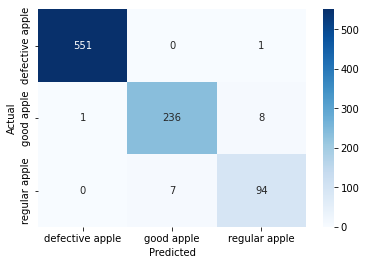

test accuracy : 98.10690423162583


In [20]:
import pandas as pd
import seaborn as sn
import tensorflow as tf

model = tf.keras.models.load_model("Saved_Model\ResNet50_Apples.h5")
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_generator.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]


out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='Blues', annot=True,fmt='d')
plt.show()
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [21]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='training') # set as training data

Found 898 images belonging to 3 classes.


In [22]:
test_generator = train_generator

1/1 [==============================] - 0s 168ms/step


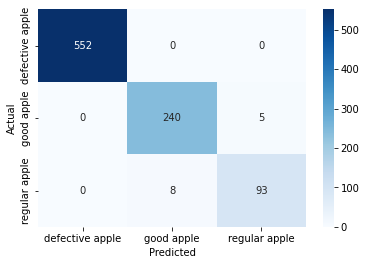

test accuracy : 98.55233853006682


In [23]:
import pandas as pd
import seaborn as sn
import tensorflow as tf

model = tf.keras.models.load_model("Saved_Model\ResNet50_Apples.h5")
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_generator.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]


out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='Blues', annot=True,fmt='d')
plt.show()
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))